## Zadanie 1

In [1]:
using LinearAlgebra
using DataFrames
using Statistics
using Plots
ENV["COLUMNS"] = 1000;

In [2]:
A = rand(1000,1000)
x = rand(1000)
b = A * x;

In [3]:
quality(y) = reduce((s, t) -> s + abs(t), y - x);

In [4]:
q1, q2, q3 = [], [], []
t1, t2, t3 = [], [], []
for i in 1:10
    append!(q1, quality(inv(A) * b))         # compiling
    append!(t1, @elapsed (inv(A) * b))
    append!(q2, quality(A \ b))              # compiling
    append!(t2, @elapsed (A \ b))
    append!(q3, quality(factorize(A) \ b))   # compiling
    append!(t3, @elapsed (factorize(A) \ b))
end

In [5]:
df = DataFrame(
    inv_quality = q1,
    inv_time = t1,
    div_quality = q2,
    div_time = t2,
    factorize_quality = q3,
    factorize_time = t3
)

,inv_quality,inv_time,div_quality,div_time,factorize_quality,factorize_time
,Any,Any,Any,Any,Any,Any
1,8.77356e-10,0.064213,5.56906e-10,0.0231074,5.56906e-10,0.0233472
2,8.77356e-10,0.0649097,5.56906e-10,0.0206563,5.56906e-10,0.0278913
3,8.77356e-10,0.0765658,5.56906e-10,0.027956,5.56906e-10,0.0224382
4,8.77356e-10,0.0725739,5.56906e-10,0.0264822,5.56906e-10,0.030651
5,8.77356e-10,0.0606566,5.56906e-10,0.0320662,5.56906e-10,0.0259469
6,8.77356e-10,0.0623736,5.56906e-10,0.0218557,5.56906e-10,0.0194378
7,8.77356e-10,0.067847,5.56906e-10,0.025543,5.56906e-10,0.0244268
8,8.77356e-10,0.0563372,5.56906e-10,0.0282023,5.56906e-10,0.024162
9,8.77356e-10,0.0536753,5.56906e-10,0.0277923,5.56906e-10,0.0198368


In [6]:
cf = combine(
    df,
    :inv_quality => mean => :inv_quality,
    :inv_time => mean,
    :inv_time => std,
    :div_quality => mean => :div_quality,
    :div_time => mean,
    :div_time => std,
    :factorize_quality => mean => :factorize_quality,
    :factorize_time => mean,
    :factorize_time => std,
)

,inv_quality,inv_time_mean,inv_time_std,div_quality,div_time_mean,div_time_std,factorize_quality,factorize_time_mean,factorize_time_std
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,8.77356e-10,0.0638865,0.00702754,5.56906e-10,0.0252647,0.0040418,5.56906e-10,0.0237815,0.0036908


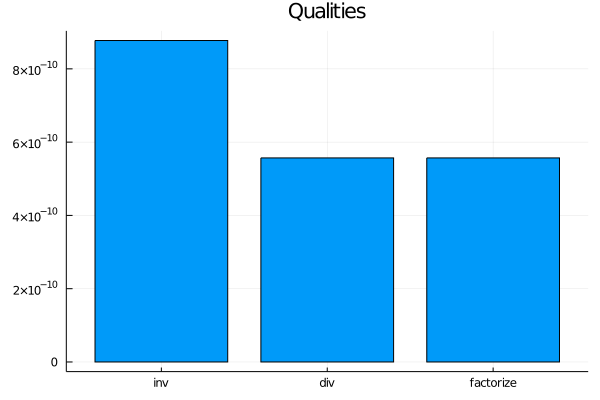

In [7]:
names = ["inv", "div", "factorize"]
values = [cf.inv_quality[1], cf.div_quality[1], cf.factorize_quality[1]]
bar(names, values, title="Qualities", legend=false)

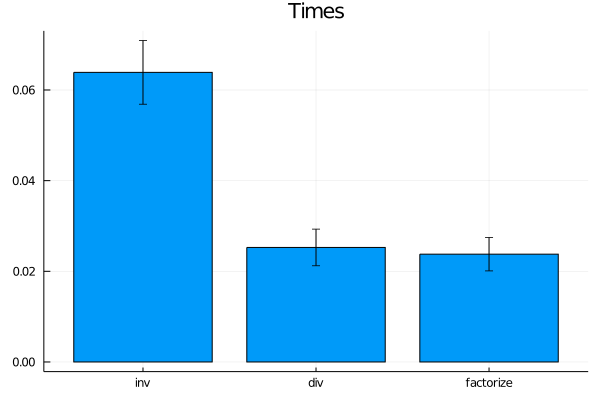

In [8]:
names = ["inv", "div", "factorize"]
values = [cf.inv_time_mean[1], cf.div_time_mean[1], cf.factorize_time_mean[1]]
stde = [cf.inv_time_std[1], cf.div_time_std[1], cf.factorize_time_std[1]]
bar(names, values, yerr=stde, title="Times", legend=false)

## Zadanie 2

In [9]:
using CSV
using DataFrames
using Statistics
using LinearAlgebra
using Polynomials

In [10]:
file = "data.csv"
df = CSV.read(file, delim=";", DataFrame)
c = combine(
    groupby(df, :n),
    "naive" => mean,
    "naive" => std,
    "better" => mean,
    "better" => std,
    "gsl" => mean,
    "gsl" => std
)

,n,naive_mean,naive_std,better_mean,better_std,gsl_mean,gsl_std
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,100,0.0005828,6.29264e-5,0.0005377,6.41492e-5,0.0005627,6.23735e-5
2,200,0.0049234,0.000213032,0.0040627,0.00014026,0.0041506,7.54633e-5
3,300,0.0171396,0.000465163,0.0137437,0.000545157,0.0138102,0.000438896
4,400,0.0416638,0.000849971,0.0325072,0.000877463,0.0325344,0.000593424
5,500,0.0947948,0.00193616,0.0623565,0.0010217,0.0625537,0.000701878
6,600,0.166947,0.00290864,0.107599,0.000752408,0.107737,0.000801558
7,700,0.268461,0.00522032,0.173393,0.00353563,0.176473,0.00296541
8,800,0.445567,0.05071,0.272172,0.0205096,0.289571,0.0260324
9,900,0.773137,0.129421,0.419585,0.0278753,0.425137,0.0330037


In [11]:
x = c[:,1]
y1 = c[:,2]
y2 = c[:,4]
y3 = c[:,6]

10-element Array{Float64,1}:
 0.0005627
 0.004150600000000001
 0.0138102
 0.0325344
 0.0625537
 0.10773700000000001
 0.1764729
 0.28957140000000003
 0.4251365000000001
 0.5578255999999999

In [12]:
A = zeros(10,4)
A[:,1] = x.^3
A[:,2] = x.^2
A[:,3] = x
A[:,4] = ones(10)
A

10×4 Array{Float64,2}:
 1.0e6    10000.0     100.0  1.0
 8.0e6    40000.0     200.0  1.0
 2.7e7    90000.0     300.0  1.0
 6.4e7   160000.0     400.0  1.0
 1.25e8  250000.0     500.0  1.0
 2.16e8  360000.0     600.0  1.0
 3.43e8  490000.0     700.0  1.0
 5.12e8  640000.0     800.0  1.0
 7.29e8  810000.0     900.0  1.0
 1.0e9        1.0e6  1000.0  1.0

In [13]:
AF = factorize(A)
println(AF.R \ ((Transpose(AF.Q) * y1)[1:4]))
println(AF.R \ ((Transpose(AF.Q) * y2)[1:4]))
println(AF.R \ ((Transpose(AF.Q) * y3)[1:4]))

[1.7871223581973616e-9, -9.623845046620115e-7, 0.0002327893108003149, -0.01472500000000074]
[6.367828865578875e-10, -7.975111888112098e-8, -1.1305619658107442e-6, 0.002231436666666447]
[5.546433760683748e-10, 6.867846736596884e-8, -6.510575369075401e-5, 0.008622833333333274]


In [14]:
println(A \ y1)
println(A \ y2)
println(A \ y3)

[1.7871223581973572e-9, -9.623845046620043e-7, 0.00023278931080031114, -0.014725000000000169]
[6.367828865578864e-10, -7.975111888111893e-8, -1.1305619658118406e-6, 0.0022314366666666176]
[5.546433760683728e-10, 6.867846736597263e-8, -6.510575369075612e-5, 0.008622833333333624]


In [15]:
println(fit(x, y1, 3))
println(fit(x, y2, 3))
println(fit(x, y3, 3))

-0.014725 + 0.000232789*x - 9.62385e-7*x^2 + 1.78712e-9*x^3
0.00223144 - 1.13056e-6*x - 7.97511e-8*x^2 + 6.36783e-10*x^3
0.00862283 - 6.51058e-5*x + 6.86785e-8*x^2 + 5.54643e-10*x^3


## Zadanie 3

Wyznaczanie wartości własnych macierzy za pomocą faktoryzacji QR polega na aplikowaniu następujących kroków:

1. Wyznaczamy faktoryzację QR macierzy A jako $A = QR$
2. Podstawiamy $A = RQ$

Powyższe kroki wykonujemy do momentu otrzymania macierzy trójkątnej górnej.
Wtedy wartościami własnymi będą wartości na przekątnej głównej macierzy A.

In [16]:
B = [1 2 3; 6 5 1; 3 2 1]

3×3 Array{Int64,2}:
 1  2  3
 6  5  1
 3  2  1

In [17]:
BF = qr(B)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
3×3 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.147442   0.925548    0.348743
 -0.884652   0.0342796  -0.464991
 -0.442326  -0.377075    0.813733
R factor:
3×3 Array{Float64,2}:
 -6.78233  -5.60279  -1.7693
  0.0       1.26834   2.43385
  0.0       0.0       1.39497

In [18]:
function isuptriangular(A)
    sz = size(A)[1]
    for i in 2:sz
        for j in 1:(i-1)
            if A[i, j] != 0
                return false
            end
        end
    end
    return true
end

isuptriangular (generic function with 1 method)

In [19]:
function eigen(B)
    while !isuptriangular(B)
        BF = qr(B)
        B = BF.R * BF.Q
    end
    diag(B)
end

eigen (generic function with 1 method)

In [20]:
eigen(B)

3-element Array{Float64,1}:
  8.274917217635371
 -2.0000000000000013
  0.7250827823646254

In [21]:
eigvals(B)

3-element Array{Float64,1}:
 -2.000000000000001
  0.7250827823646246
  8.274917217635368